In [16]:
import numpy as np
import cv2
import pandas as pd

img = cv2.imread('./37_2.jpg')
LAB = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# init values
m = 1.
n = 1.
c = 1.
d = (1.01 - 1.0)/200
i = 0.
t = 37.

a_scale = []
b_scale = []
l_scale = []
target = []

while m <= 1.01:
    t += 5
    m += d
    n += d
    c += d*0.01
    l = LAB[:,:,0] * c
    a = LAB[:,:,1] * m
    b = LAB[:,:,2] * n

    LAB[:,:,0] = l
    LAB[:,:,1] = a
    LAB[:,:,2] = b

    # find mean
    a_scale.append(np.mean(a))
    b_scale.append(np.mean(b))
    l_scale.append(np.mean(l))
    target.append(t)
    

    #BGR = cv2.cvtColor(LAB, cv2.COLOR_LAB2BGR)
    #cv2.imwrite('./data/test_{}.png'.format(i), BGR)
    i+=1

In [17]:
# create data
data_dict = {'a': a_scale, 'b': b_scale, 'l': l_scale, 't': target}
data = pd.DataFrame(data_dict)

In [18]:
# train
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['a', 'b', 'l']], data['t'], random_state=0, test_size=0.3)
reg = GradientBoostingRegressor(
    loss='squared_error',
    learning_rate=0.5,
    n_estimators=100,
    verbose=1
    )
reg.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1       21631.2791            0.10s
         2        5751.8371            0.10s
         3        1631.3991            0.06s
         4         536.3530            0.05s
         5         253.3451            0.06s
         6         170.0750            0.05s
         7         128.7652            0.04s
         8         100.2390            0.05s
         9          81.1616            0.04s
        10          66.5201            0.04s
        20          28.2373            0.03s
        30          12.2691            0.03s
        40           5.0258            0.02s
        50           2.4165            0.02s
        60           1.3405            0.01s
        70           0.7681            0.01s
        80           0.4096            0.01s
        90           0.2539            0.00s
       100           0.1352            0.00s


GradientBoostingRegressor(learning_rate=0.5, verbose=1)

In [19]:
reg.score(X_train, y_train)

0.9999983670273771

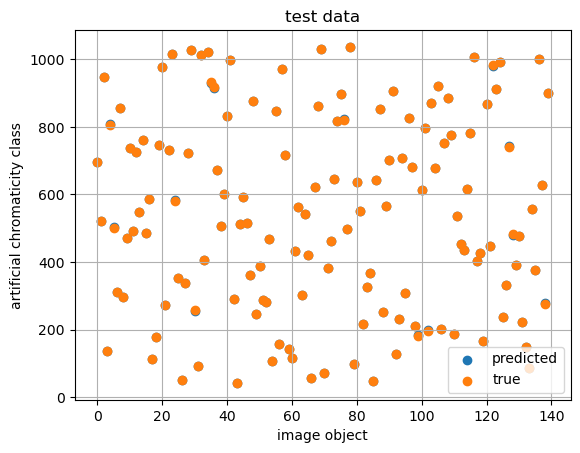

In [20]:
import matplotlib.pyplot as plt

y_train_predicted = reg.predict(X_train)
plt.scatter(np.arange(0,len(y_train_predicted)), y_train_predicted, label='predicted')
plt.scatter(np.arange(0,len(y_train)), y_train, label='true')
plt.title('test data')
plt.xlabel('image object')
plt.ylabel('artificial chromaticity class')
plt.grid()
plt.legend()
plt.show()

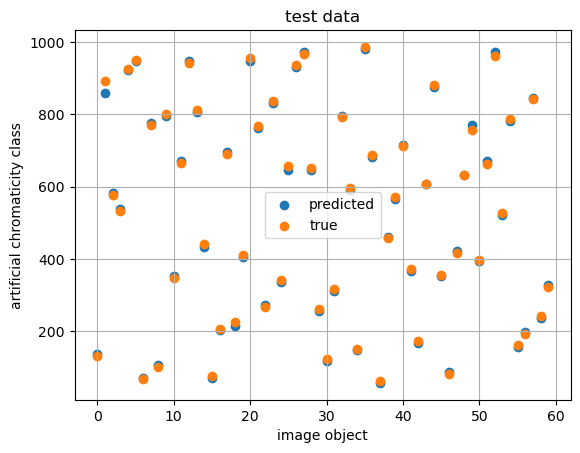

In [21]:
y_test_predicted = reg.predict(X_test)
y_test_ = y_test.to_numpy()
plt.scatter(np.arange(0,len(y_test_predicted)), y_test_predicted, label='predicted')
plt.scatter(np.arange(0,len(y_test_)), y_test_, label='true')
plt.title('test data')
plt.xlabel('image object')
plt.ylabel('artificial chromaticity class')
plt.grid()
plt.legend()
plt.show()

In [23]:
# RMSE
def rmse(y_hat, y_t):
    return np.sqrt(np.sum(np.square(y_t - y_hat)))

print(f'RMSE: {round(rmse(y_test_predicted, y_test_),3)}')

# Relative Error
def relError(y_hat, y_t):
    e = []
    for idx in range(len(y_t)):
        tmp_value = abs(y_t[idx] - y_hat[idx])*100/y_t[idx]
        e.append(tmp_value)
    return e

print(f'max Relative Error: {round(max(relError(y_test_predicted, y_test_)),3)} %')
print(f'min Relative Error: {round(min(relError(y_test_predicted, y_test_)),3)} %')

RMSE: 54.932
max Relative Error: 7.995 %
min Relative Error: 0.019 %
